In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import tensorflow as tf

from src.DataPreprocessor.data_preprocessor import DataPreprocessor, Mode
from src.LearningKeras.net_architecture import cnn_150x150x5
from src.LearningKeras.train import KerasTrainer

from tqdm import trange

np.random.seed(1)
tf.set_random_seed(2)

check data_visualisation for details

In [3]:
from src.DataPreprocessor.DataIOBackend.gdal_backend import GdalBackend
from src.DataPreprocessor.data_visualiser import DataVisualiser

dataiobackend = GdalBackend()
data_preprocessor = DataPreprocessor(data_dir="data/Region 1 - Lopukangri/",
                              backend=dataiobackend,
                              filename_prefix="tibet",
                              mode=Mode.TRAIN,
                              seed=1)

## NN

### Train

In [4]:
model_generator = lambda: cnn_150x150x5()
ensemble_size = 5
batch_size = 5

trainer = KerasTrainer(model_generator=model_generator,
                       ensemble_size=ensemble_size,
                       data_preprocessor=data_preprocessor,
                       batch_size=batch_size)

Epoch 1/5
50/50 [==============================] - 74s 1s/step - loss: 0.5439 - acc: 0.7160 - val_loss: 0.4368 - val_acc: 0.8000
Epoch 2/5
50/50 [==============================] - 70s 1s/step - loss: 0.4153 - acc: 0.7760 - val_loss: 0.1918 - val_acc: 0.9200
Epoch 3/5
50/50 [==============================] - 71s 1s/step - loss: 0.2588 - acc: 0.8800 - val_loss: 0.0901 - val_acc: 0.9600
Epoch 4/5
50/50 [==============================] - 70s 1s/step - loss: 0.1271 - acc: 0.9680 - val_loss: 0.0302 - val_acc: 1.0000
Epoch 5/5
50/50 [==============================] - 70s 1s/step - loss: 0.0619 - acc: 0.9840 - val_loss: 0.0950 - val_acc: 0.9200


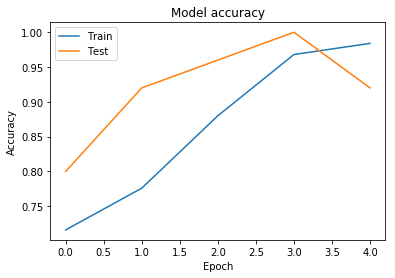

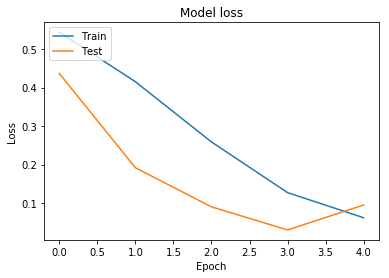

Epoch 1/5
50/50 [==============================] - 77s 2s/step - loss: 0.6842 - acc: 0.6360 - val_loss: 0.3053 - val_acc: 0.8800
Epoch 2/5
50/50 [==============================] - 73s 1s/step - loss: 0.3707 - acc: 0.8160 - val_loss: 0.2780 - val_acc: 0.9200
Epoch 3/5
50/50 [==============================] - 72s 1s/step - loss: 0.3437 - acc: 0.8480 - val_loss: 0.1529 - val_acc: 0.9200
Epoch 4/5
50/50 [==============================] - 70s 1s/step - loss: 0.2588 - acc: 0.8800 - val_loss: 0.1866 - val_acc: 0.9200
Epoch 5/5
50/50 [==============================] - 71s 1s/step - loss: 0.2240 - acc: 0.9200 - val_loss: 0.2984 - val_acc: 0.8800


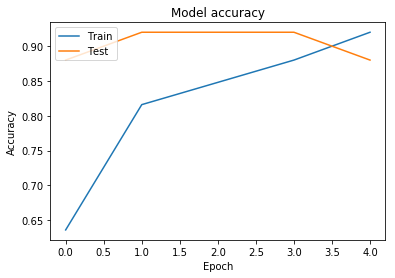

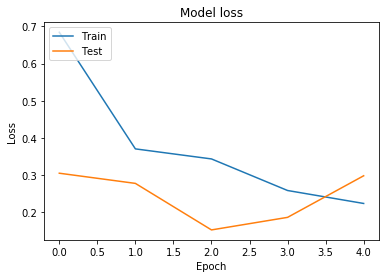

Epoch 1/5
50/50 [==============================] - 83s 2s/step - loss: 0.6533 - acc: 0.7200 - val_loss: 0.7649 - val_acc: 0.6400
Epoch 2/5
50/50 [==============================] - 76s 2s/step - loss: 0.3347 - acc: 0.8680 - val_loss: 0.2470 - val_acc: 0.8800
Epoch 3/5
50/50 [==============================] - 73s 1s/step - loss: 0.2114 - acc: 0.9200 - val_loss: 0.0427 - val_acc: 1.0000
Epoch 4/5
50/50 [==============================] - 78s 2s/step - loss: 0.1203 - acc: 0.9520 - val_loss: 0.0165 - val_acc: 1.0000
Epoch 5/5
50/50 [==============================] - 75s 2s/step - loss: 0.1021 - acc: 0.9680 - val_loss: 0.0105 - val_acc: 1.0000


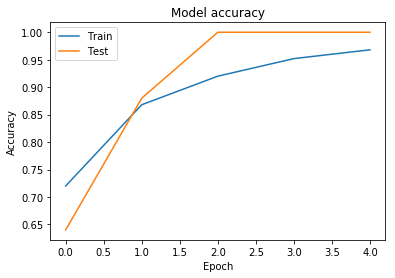

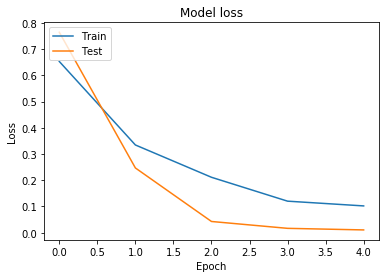

Epoch 1/5
50/50 [==============================] - 85s 2s/step - loss: 0.5462 - acc: 0.7360 - val_loss: 0.3005 - val_acc: 0.9600
Epoch 2/5
50/50 [==============================] - 79s 2s/step - loss: 0.2321 - acc: 0.9000 - val_loss: 0.1503 - val_acc: 0.9600
Epoch 3/5
50/50 [==============================] - 79s 2s/step - loss: 0.1467 - acc: 0.9360 - val_loss: 0.0194 - val_acc: 1.0000
Epoch 4/5
50/50 [==============================] - 70s 1s/step - loss: 0.0643 - acc: 0.9840 - val_loss: 0.0865 - val_acc: 0.9600
Epoch 5/5
50/50 [==============================] - 70s 1s/step - loss: 0.0653 - acc: 0.9880 - val_loss: 0.0240 - val_acc: 1.0000


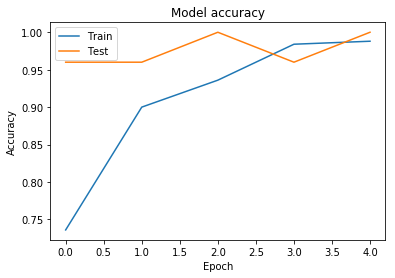

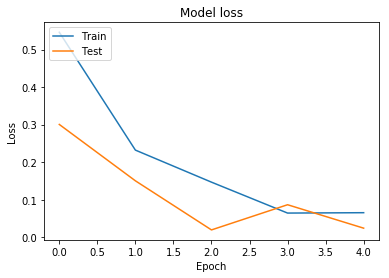

Epoch 1/5
50/50 [==============================] - 129s 3s/step - loss: 0.6246 - acc: 0.6960 - val_loss: 0.3009 - val_acc: 0.8800
Epoch 2/5
50/50 [==============================] - 92s 2s/step - loss: 0.4080 - acc: 0.8160 - val_loss: 0.1947 - val_acc: 0.9200
Epoch 3/5
50/50 [==============================] - 104s 2s/step - loss: 0.3400 - acc: 0.8160 - val_loss: 0.3271 - val_acc: 0.8800
Epoch 4/5
50/50 [==============================] - 71s 1s/step - loss: 0.2108 - acc: 0.9000 - val_loss: 0.1356 - val_acc: 0.9600
Epoch 5/5
50/50 [==============================] - 70s 1s/step - loss: 0.2218 - acc: 0.9120 - val_loss: 0.2576 - val_acc: 0.8400


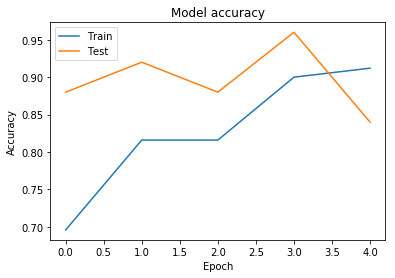

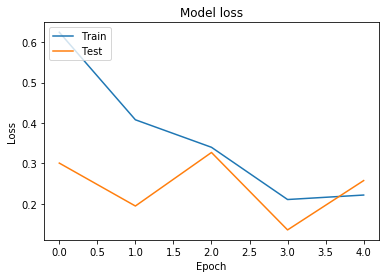

In [32]:
trainer.train(steps_per_epoch=50, epochs=5)